# Diving into the Airbnb data

Have you pulled your Airbnb data into a json file yet? If not, check the readme for instructions on how to do this.

If you've got your json file all ready, great — you're ready to take a look at your data.

Note that the dataset I used this notebook is a very small test batch! Yours will probably look more interesting.

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import re
%matplotlib inline

In [97]:
airbnb = pd.read_json("../output/airbnb_flat.json")
len(airbnb)

46

See what states the listings are in. If there are a bunch of missing entries here, that's a good indication that you should go back and rerun the geocoding function. If it looks good, go ahead and start exploring.

In [98]:
airbnb["state"].value_counts()

Massachusetts    27
Vermont          14
New York          5
Name: state, dtype: int64

In [99]:
airbnb_vt = airbnb[airbnb["state"]=="Vermont"]

In [100]:
airbnb_vt["county"].value_counts().reset_index().rename(columns={"index":"county","county":"total"})

,county,total
0,Bennington County,14


Let's see how many unique hosts we've got in our filtered dataset.

In [101]:
host_summary = airbnb_vt["hostid"].value_counts()
len(host_summary)

9

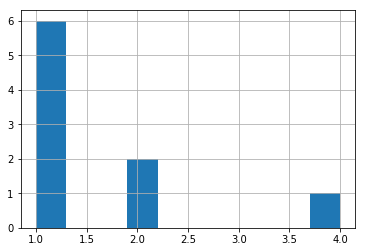

In [102]:
airbnb_vt["hostid"].value_counts().hist()

In [103]:
airbnb_vt["town"].value_counts()

Pownal    14
Name: town, dtype: int64

In [104]:
airbnb_vt["room_type"].value_counts()

Entire home/apt    9
Private room       5
Name: room_type, dtype: int64

In [105]:
beds = airbnb_vt["beds"].value_counts().reset_index().rename(columns={'beds':"listings","index":"beds"})
beds

,beds,listings
0,2,5
1,1,4
2,6,2
3,4,2
4,3,1


(array([ 4.,  0.,  5.,  0.,  1.,  0.,  2.,  0.,  0.,  2.]),
 array([ 1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,  6. ]),
 <a list of 10 Patch objects>)

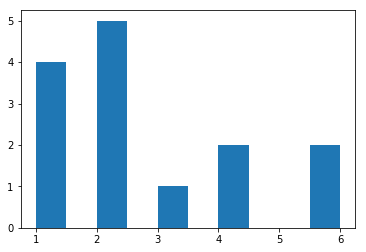

In [106]:
plt.hist(x=airbnb_vt["beds"])

## explore pricing data
The price data we've got is just one data point, but let's see what it looks like, anyway.

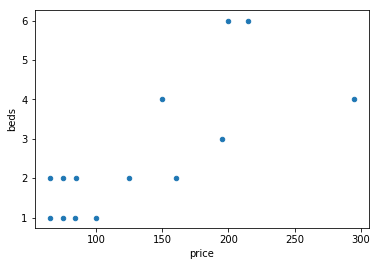

In [24]:
airbnb_vt.plot.scatter(x="price", y="beds")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1078dd350>]], dtype=object)

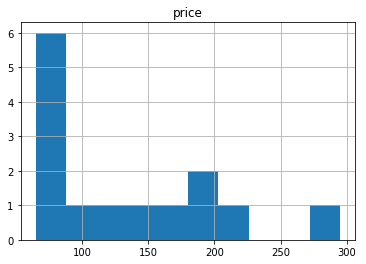

In [25]:
airbnb_vt[airbnb_vt["price"]<1000].hist(column="price")

## map it
Let's make some maps to see what we've got!

In [19]:
import folium

# change the center point if needed
map_osm = folium.Map(location=[43.986943, -72.671676],
                     zoom_start=8)

marker_cluster = folium.MarkerCluster("Cluster Name").add_to(map_osm)

for index, row in airbnb_vt.iterrows():
    html = ("""
            <h2>%s</h2>
            <b>Room type</b>: %s<br>
            <b>Price</b>: %s<br>
            <a href="https://www.airbnb.com/rooms/%s" target="_blank">Link</a>
            """) % (row["name"], row["room_type"],row["price"], row["id"])
    
    iframe = folium.IFrame(html=html, width=400, height=200)
    popup = folium.Popup(iframe, max_width=1000)
    
    folium.Marker(location=[row["lat"], row["lng"]], popup=popup).add_to(marker_cluster)

map_osm.save("../output/map.html")

How 'bout a heatmap?

In [93]:
from folium import plugins

# again, change this center point if you need to.
heatmap = folium.Map(location=[43.986943, -72.671676],
                     zoom_start=8)

airbnbArr = airbnb_vt[["lat","lng"]].as_matrix()

heatmap.add_child(plugins.HeatMap(airbnbArr, radius=12))
heatmap.save("../output/heatmap.html")

## let's see some marketing
What words are people using to describe their Airbnbs?

In [68]:
frequency = airbnb_vt["name"].str.lower()

frequency_list = []

for item in frequency:
    try:
        itemlist = re.split('[ .-]',item)
        for i in itemlist:
            if i not in ["","in","on","the","to","with","of","3","2","and","at","a","near","from","vermont","vt"]:
                frequency_list.append([i])
    except:
        pass

frequency_list = pd.DataFrame(frequency_list, columns=["word"])
frequency_list["word"].value_counts().head(10)

artist        4
room          3
guesthouse    3
cozy          3
house         2
fork"         2
guest         2
green         2
pownal        2
retreat       2
Name: word, dtype: int64